In [45]:
# Importez les bibliothèques nécessaires
from collections import Counter
from statistics import mean, stdev, median
import matplotlib.pyplot as plt
import pandas as pd

In [36]:
# Importation du jeu de donnée
scraper = pd.read_csv("scrap.csv")

In [7]:
# Affichez les titres de livres les plus fréquents
titles_counter = Counter(scraper.title)
most_common_titles = titles_counter.most_common(10)
print("Titres de livres les plus fréquents :")
for title, count in most_common_titles:
    print(f"- {title}: {count} occurrences")

Titres de livres les plus fréquents :
- The Star-Touched Queen: 2 occurrences
- A Light in the Attic: 1 occurrences
- Tipping the Velvet: 1 occurrences
- Soumission: 1 occurrences
- Sharp Objects: 1 occurrences
- Sapiens: A Brief History of Humankind: 1 occurrences
- The Requiem Red: 1 occurrences
- The Dirty Little Secrets of Getting Your Dream Job: 1 occurrences
- The Coming Woman: A Novel Based on the Life of the Infamous Feminist, Victoria Woodhull: 1 occurrences
- The Boys in the Boat: Nine Americans and Their Epic Quest for Gold at the 1936 Berlin Olympics: 1 occurrences


In [10]:
# Calculer la moyenne et l'écart-type des prix
prices = [float(price[1:]) for price in scraper.price]
mean_price = mean(prices)
stdev_price = stdev(prices)
print(f"Moyenne des prix : {mean_price:.2f}")
print(f"Écart-type des prix : {stdev_price:.2f}")

Moyenne des prix : 35.07
Écart-type des prix : 14.45


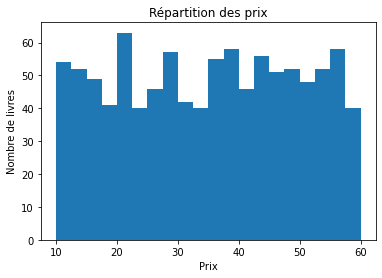

In [11]:
# Créez un histogramme des prix
plt.hist(prices, bins=20)
plt.title("Répartition des prix")
plt.xlabel("Prix")
plt.ylabel("Nombre de livres")
plt.show()

In [38]:
def to_int(s):
    # Dictionnaire de correspondance entre chaînes de caractères et entiers
    numbers = {
        'zero': 0,
        'one': 1,
        'two': 2,
        'three': 3,
        'four': 4,
        'five': 5
    }
    
    # Retournez l'entier correspondant à la chaîne de caractères, ou None si la chaîne n'est pas reconnue
    return numbers.get(s.lower())

In [39]:
#Application sur les notes
for i in range(len(scraper)):
    scraper.stars.iloc[i] = to_int(scraper.stars.iloc[i])

In [47]:
# Calculer la moyenne et la mediane des notes
mean_stars = mean(scraper.stars)
med_stars = median(scraper.stars)
print(f"Moyenne des prix : {mean_stars:.2f}")
print(f"Valeure médiane des prix : {med_stars:.2f}")

Moyenne des prix : 2.92
Valeure médiane des prix : 3.00


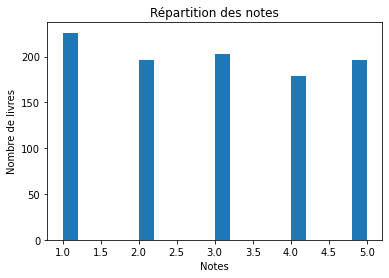

In [49]:
# Créez un histogramme des notes
plt.hist(scraper.stars, bins=20)
plt.title("Répartition des notes")
plt.xlabel("Notes")
plt.ylabel("Nombre de livres")
plt.show()